Case study on Supervised learning

Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Read the dataset to the python environment.

In [2]:
df=pd.read_excel('iris.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.shape

(150, 5)

In [7]:
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# Do necessary pre-processing steps.

In [8]:
# FILLED ALL THE MISSING VALUES WITH MEDIAN VALUE FOR SL,SW,PL
df['SL'].fillna(df['SL'].median(),inplace=True)
df['SW'].fillna(df['SW'].median(),inplace=True)
df['PL'].fillna(df['PL'].median(),inplace=True)
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<AxesSubplot:xlabel='SL'>

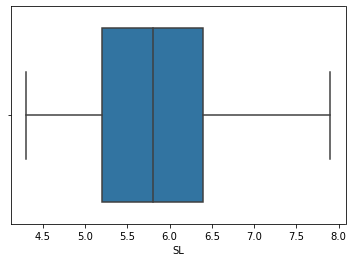

In [9]:
#checking for outliers using boxplot
sns.boxplot(df['SL'])

No outliers found in SL values


<AxesSubplot:xlabel='SW'>

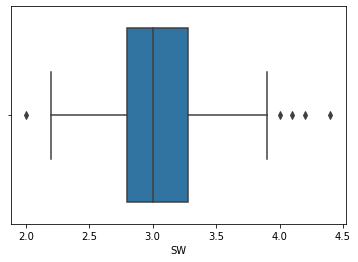

In [10]:
sns.boxplot(df['SW'])

In [11]:
Q1=np.percentile(df['SW'],25,interpolation="midpoint")
Q3=np.percentile(df['SW'],75,interpolation="midpoint")
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

outlier=[]
for x in df["SW"]:
    if(x>=up_lim)or(x<=low_lim):
        outlier.append(x)
#print(len(outlier), "outliers found in the SW values")

#outliers are replaced with MEDIAN value
median_sw=float(np.median(df['SW']))
for i in outlier:
    df.loc[df['SW']==i, 'SW'] = np.nan # set all the outliers to null value
    
    #df['SW'] = np.where(df['SW']==i, median_sw, df['SW']) 
#replaced null values with median value
df['SW'].fillna(median_sw,inplace=True)


<AxesSubplot:xlabel='SW'>

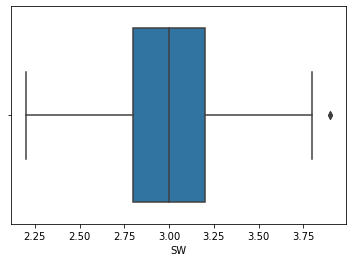

In [12]:
#after treating the outliers the box plot looks
sns.boxplot(df['SW'])

<AxesSubplot:xlabel='PL'>

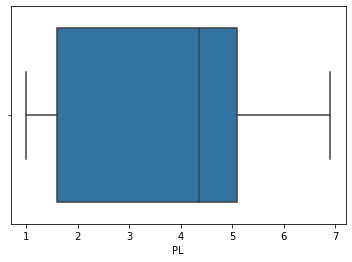

In [13]:
sns.boxplot(df['PL'])

<AxesSubplot:xlabel='PW'>

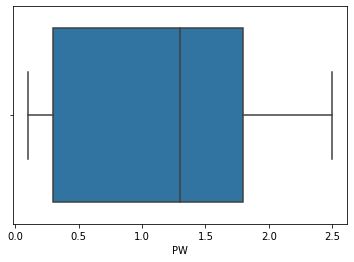

In [14]:
sns.boxplot(df['PW'])

# Find out which classification model gives the best result to predict iris species.(also do random forest algorithm

In [15]:
#Create Dependent and Independent Datasets based on Dependent and Independent features
X  =df[['SL','SW','PL','PW']]
y= df['Classification']

from sklearn.model_selection import train_test_split
#Split the Data into Training and Testing sets with test size as 30%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
X_train.shape

(105, 4)

# a) SVM Classifier

# Linear

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pred=svm_linear.predict(X_test)
# using metrics module for accuracy calculation
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))
print("Precision score of the model: ", precision_score(y_test, y_pred,average='macro'))
print("Recall score of the model: ", recall_score(y_test, y_pred,average='macro'))
print("Confuion Matrix \n", confusion_matrix(y_test, y_pred))

ACCURACY of the model:  0.9777777777777777
F - score of the model:  0.9786453119786453
Precision score of the model:  0.9761904761904763
Recall score of the model:  0.9824561403508771
Confuion Matrix 
 [[18  1  0]
 [ 0 13  0]
 [ 0  0 13]]


# Polynomial

In [18]:
svm_poly=SVC(kernel='poly')
svm_poly.fit(X_train,y_train)
y_pred=svm_poly.predict(X_test)
# using metrics module for accuracy calculation
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))
print("Precision score of the model: ", precision_score(y_test, y_pred,average='macro'))
print("Recall score of the model: ", recall_score(y_test, y_pred,average='macro'))
print("Confuion Matrix \n", confusion_matrix(y_test, y_pred))

ACCURACY of the model:  0.9777777777777777
F - score of the model:  0.974320987654321
Precision score of the model:  0.9761904761904763
Recall score of the model:  0.9743589743589745
Confuion Matrix 
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


# Radial Basis Function(RBF)

In [19]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)
y_pred=svm_radial.predict(X_test)
# using metrics module for accuracy calculation
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))
print("Precision score of the model: ", precision_score(y_test, y_pred,average='macro'))
print("Recall score of the model: ", recall_score(y_test, y_pred,average='macro'))
print("Confuion Matrix \n", confusion_matrix(y_test, y_pred))

ACCURACY of the model:  0.9777777777777777
F - score of the model:  0.9786453119786453
Precision score of the model:  0.9761904761904763
Recall score of the model:  0.9824561403508771
Confuion Matrix 
 [[18  1  0]
 [ 0 13  0]
 [ 0  0 13]]


# b) Decision Tree classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
# using metrics module for accuracy calculation
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))
print("Precision score of the model: ", precision_score(y_test, y_pred,average='macro'))
print("Recall score of the model: ", recall_score(y_test, y_pred,average='macro'))
print("Confuion Matrix \n", confusion_matrix(y_test, y_pred))

ACCURACY of the model:  1.0
F - score of the model:  1.0
Precision score of the model:  1.0
Recall score of the model:  1.0
Confuion Matrix 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


# c) Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression
logic_model=LogisticRegression()
logic_model.fit(X_train,y_train)
y_pred=logic_model.predict(X_test)

# using metrics module for accuracy calculation
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))
print("Precision score of the model: ", precision_score(y_test, y_pred,average='macro'))
print("Recall score of the model: ", recall_score(y_test, y_pred,average='macro'))
print("Confuion Matrix \n", confusion_matrix(y_test, y_pred))

ACCURACY of the model:  0.9777777777777777
F - score of the model:  0.9786453119786453
Precision score of the model:  0.9761904761904763
Recall score of the model:  0.9824561403508771
Confuion Matrix 
 [[18  1  0]
 [ 0 13  0]
 [ 0  0 13]]


# d) KNN Model

In [22]:
#standard scaling before applying model

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
logic_model=LogisticRegression()
logic_model.fit(X_train,y_train)
y_pred=logic_model.predict(X_test)
# using metrics module for accuracy calculation
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))
print("Precision score of the model: ", precision_score(y_test, y_pred,average='macro'))
print("Recall score of the model: ", recall_score(y_test, y_pred,average='macro'))
print("Confuion Matrix \n", confusion_matrix(y_test, y_pred))

ACCURACY of the model:  0.9333333333333333
F - score of the model:  0.9220389805097451
Precision score of the model:  0.9375
Recall score of the model:  0.923076923076923
Confuion Matrix 
 [[19  0  0]
 [ 0 10  3]
 [ 0  0 13]]


Text(0, 0.5, 'accuracy')

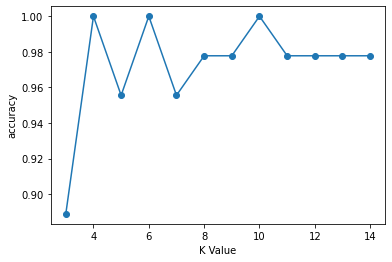

In [23]:

#applying KNN classifier
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    acc_values.append(accuracy)
    
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K Value')
plt.ylabel('accuracy')

In [24]:
#testing for k value

classifier = KNeighborsClassifier(n_neighbors=10,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Accuracy when k=10 is",accuracy_score(y_test,y_pred))


classifier = KNeighborsClassifier(n_neighbors=2,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Accuracy when k=2 is ",accuracy_score(y_test,y_pred))


classifier = KNeighborsClassifier(n_neighbors=6,metric='minkowski')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print("Accuracy when k=6 is ",accuracy_score(y_test,y_pred))

Accuracy when k=10 is 1.0
Accuracy when k=2 is  1.0
Accuracy when k=6 is  1.0


# e) Random Forest Classifier.

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100,random_state=0,criterion='entropy') 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
#print(confusion_matrix(y_test,y_pred))
 
# using metrics module for accuracy calculation
print("ACCURACY of the model: ", accuracy_score(y_test, y_pred))
print("F - score of the model: ", f1_score(y_test, y_pred,average='macro'))
print("Precision score of the model: ", precision_score(y_test, y_pred,average='macro'))
print("Recall score of the model: ", recall_score(y_test, y_pred,average='macro'))
print("Confuion Matrix \n", confusion_matrix(y_test, y_pred))

ACCURACY of the model:  0.9777777777777777
F - score of the model:  0.974320987654321
Precision score of the model:  0.9761904761904763
Recall score of the model:  0.9743589743589745
Confuion Matrix 
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


from the above tests , it is found that Decision Tree and KNN classifier model with no: of neighbour count 2,6,10 give best results in predicting the series. Higher the ACCURACY score and F score, the model is chosen.